In [ ]:
import pandas as pd 
import json
import numpy as np 
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
import os 


In [3]:
%pwd

'c:\\Users\\abhis\\OneDrive\\Desktop\\Oil_Retail\\research'

In [4]:
df = pd.read_csv(r"C:\Users\abhis\OneDrive\Desktop\Oil_Retail\data\oil_retail_history.csv")
df.head()

,date,price,cost,comp1_price,comp2_price,comp3_price,volume
0,2023-01-01,97.66,86.46,98.39,99.10,97.37,13513
1,2023-01-02,96.46,87.25,95.37,96.25,97.38,13605
2,2023-01-03,94.67,86.40,94.41,94.69,94.50,16540
3,2023-01-04,97.32,87.51,99.12,96.90,97.54,14927
4,2023-01-05,94.08,86.38,93.31,94.61,93.85,13332


In [5]:
df.shape

(730, 7)

In [6]:
df.dtypes

date            object
price          float64
cost           float64
comp1_price    float64
comp2_price    float64
comp3_price    float64
volume           int64
dtype: object

In [7]:
df.isnull().sum()

date           0
price          0
cost           0
comp1_price    0
comp2_price    0
comp3_price    0
volume         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         730 non-null    object 
 1   price        730 non-null    float64
 2   cost         730 non-null    float64
 3   comp1_price  730 non-null    float64
 4   comp2_price  730 non-null    float64
 5   comp3_price  730 non-null    float64
 6   volume       730 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.0+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,price,cost,comp1_price,comp2_price,comp3_price,volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,96.505301,86.498178,96.551658,96.530068,96.457260,13960.983562
std,2.747598,1.575689,2.779654,2.796763,2.782295,905.912360
min,88.080000,83.340000,88.320000,87.070000,86.080000,11397.000000
25%,94.670000,85.302500,94.555000,94.827500,94.712500,13326.250000
50%,96.525000,86.255000,96.590000,96.430000,96.515000,13882.000000
75%,98.420000,87.610000,98.467500,98.447500,98.097500,14538.750000
max,104.890000,91.860000,104.200000,105.000000,104.360000,16890.000000


In [11]:
df["date"] = pd.to_datetime(df["date"])

In [12]:
df.dtypes

date           datetime64[ns]
price                 float64
cost                  float64
comp1_price           float64
comp2_price           float64
comp3_price           float64
volume                  int64
dtype: object

Customers choose where to buy petrol by comparing prices
If our companys price is higher than competitors → volume decreases lower than competitors → volume increases same as competitors → normal volume Being more expensive → volume drops Being cheaper → volume increases

So relative price, NOT just the absolute price, affects demand.This is called cross-price elasticity in economics.

In [13]:
df['gap_comp1'] = df['price'] - df['comp1_price']
df['gap_comp2'] = df['price'] - df['comp2_price']
df['gap_comp3'] = df['price'] - df['comp3_price']

In [14]:
df.shape

(730, 10)

In [15]:
df.head()

,date,price,cost,comp1_price,comp2_price,comp3_price,volume,gap_comp1,gap_comp2,gap_comp3
0,2023-01-01,97.66,86.46,98.39,99.10,97.37,13513,-0.73,-1.44,0.29
1,2023-01-02,96.46,87.25,95.37,96.25,97.38,13605,1.09,0.21,-0.92
2,2023-01-03,94.67,86.40,94.41,94.69,94.50,16540,0.26,-0.02,0.17
3,2023-01-04,97.32,87.51,99.12,96.90,97.54,14927,-1.80,0.42,-0.22
4,2023-01-05,94.08,86.38,93.31,94.61,93.85,13332,0.77,-0.53,0.23


In [16]:
df['price_lag_1'] = df['price'].shift(1)
df['volume_lag_1'] = df['volume'].shift(1)

In [17]:
df.head()

,date,price,cost,comp1_price,comp2_price,comp3_price,volume,gap_comp1,gap_comp2,gap_comp3,price_lag_1,volume_lag_1
0,2023-01-01,97.66,86.46,98.39,99.10,97.37,13513,-0.73,-1.44,0.29,NaN,NaN
1,2023-01-02,96.46,87.25,95.37,96.25,97.38,13605,1.09,0.21,-0.92,97.66,13513.0
2,2023-01-03,94.67,86.40,94.41,94.69,94.50,16540,0.26,-0.02,0.17,96.46,13605.0
3,2023-01-04,97.32,87.51,99.12,96.90,97.54,14927,-1.80,0.42,-0.22,94.67,16540.0
4,2023-01-05,94.08,86.38,93.31,94.61,93.85,13332,0.77,-0.53,0.23,97.32,14927.0


In [18]:
df['volume_ma_7'] = df['volume'].rolling(window=7).mean()
df['volume_ma_30'] = df['volume'].rolling(window=30).mean()

In [19]:
df.shape

(730, 14)

In [20]:
df.head()

,date,price,cost,comp1_price,comp2_price,comp3_price,volume,gap_comp1,gap_comp2,gap_comp3,price_lag_1,volume_lag_1,volume_ma_7,volume_ma_30
0,2023-01-01,97.66,86.46,98.39,99.10,97.37,13513,-0.73,-1.44,0.29,NaN,NaN,NaN,NaN
1,2023-01-02,96.46,87.25,95.37,96.25,97.38,13605,1.09,0.21,-0.92,97.66,13513.0,NaN,NaN
2,2023-01-03,94.67,86.40,94.41,94.69,94.50,16540,0.26,-0.02,0.17,96.46,13605.0,NaN,NaN
3,2023-01-04,97.32,87.51,99.12,96.90,97.54,14927,-1.80,0.42,-0.22,94.67,16540.0,NaN,NaN
4,2023-01-05,94.08,86.38,93.31,94.61,93.85,13332,0.77,-0.53,0.23,97.32,14927.0,NaN,NaN


In [21]:
df = df.dropna()

In [22]:
df.shape

(701, 14)

In [23]:
df.head()

,date,price,cost,comp1_price,comp2_price,comp3_price,volume,gap_comp1,gap_comp2,gap_comp3,price_lag_1,volume_lag_1,volume_ma_7,volume_ma_30
29,2023-01-30,93.61,85.19,94.24,91.96,93.34,13387,-0.63,1.65,0.27,91.16,13910.0,13960.428571,13976.266667
30,2023-01-31,98.79,86.22,98.50,97.11,98.66,13949,0.29,1.68,0.13,93.61,13387.0,13796.000000,13990.800000
31,2023-02-01,93.46,85.19,93.73,95.29,92.97,14500,-0.27,-1.83,0.49,98.79,13949.0,13717.428571,14020.633333
32,2023-02-02,101.08,86.10,100.57,101.99,100.82,14741,0.51,-0.91,0.26,93.46,14500.0,13926.142857,13960.666667
33,2023-02-03,96.29,87.80,97.42,97.14,96.85,14584,-1.13,-0.85,-0.56,101.08,14741.0,14084.000000,13949.233333


In [24]:
target = "volume"

features = [
    'price', 'cost',
    'comp1_price', 'comp2_price', 'comp3_price',
    'gap_comp1', 'gap_comp2', 'gap_comp3',
    'price_lag_1', 'volume_lag_1',
    'volume_ma_7', 'volume_ma_30'

]

In [29]:
X = df[features]
y = df[target]

In [30]:
train_size = int(len(df) * 0.8)

In [31]:
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

In [32]:
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [33]:
X_train.shape, X_test.shape

((560, 12), (141, 12))

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np 

In [37]:
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

In [38]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [39]:
y_pred = model.predict(X_test)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

rmse, mape

(922.861013818889, 5.2722760467078)

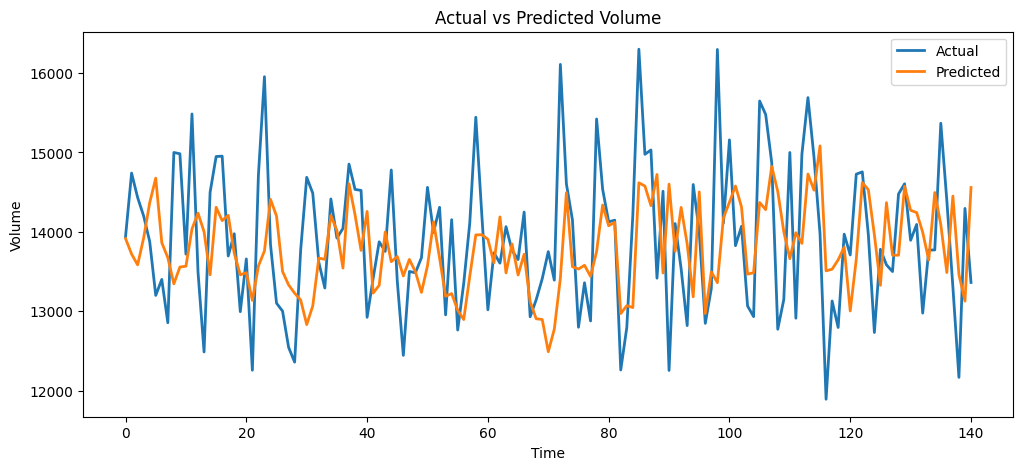

In [ ]:
import matplotlib.pyplot as plt

plt().figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual", linewidth=2)
plt.plot(y_pred, label="Predicted", linewidth=2)
plt.title("Actual vs Predicted Volume")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.show

In [42]:
import numpy as np
import pandas as pd

def recommend_price(model, today_data, price_range=np.arange(85, 110, 0.1)):
    results = []

    for p in price_range:
        row = today_data.copy()
        row['price'] = p
        
        row['gap_comp1'] = row['price'] - row['comp1_price']
        row['gap_comp2'] = row['price'] - row['comp2_price']
        row['gap_comp3'] = row['price'] - row['comp3_price']

        row['price_lag_1'] = row['price']
        row['volume_lag_1'] = df['volume'].iloc[-1]
        row['volume_ma_7'] = df['volume'].tail(7).mean()
        row['volume_ma_30'] = df['volume'].tail(30).mean()

        row_df = pd.DataFrame([row])

        predicted_volume = model.predict(row_df[features])[0]

        profit = (p - row['cost']) * predicted_volume

        results.append([p, predicted_volume, profit])

    results_df = pd.DataFrame(results, columns=['price', 'pred_volume', 'profit'])

    best_row = results_df.loc[results_df['profit'].idxmax()]

    return best_row, results_df

In [44]:
%pwd

'c:\\Users\\abhis\\OneDrive\\Desktop\\Oil_Retail\\research'

In [45]:
os.chdir("../")

In [46]:
%pwd

'c:\\Users\\abhis\\OneDrive\\Desktop\\Oil_Retail'

In [49]:
today = pd.read_json(r"C:\Users\abhis\OneDrive\Desktop\Oil_Retail\data\today_example.json")
today_data = today.iloc[0].to_dict()

best_price, full_table = recommend_price(model, today_data)
best_price


ValueError: If using all scalar values, you must pass an index